## CSIS 3290 – 001 – Term Project
### Name- Abhinav Kulshrestha
### Student ID- 300337257

### Brief Introduction : 
The dataset we are using here is of Automobiles and their characteristics and their performance ratings i.e drive-wheels,maker etc.
We are going to use this data in order to predict the insurance allotted to the automobiles justified by their characteristics

#### importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.stats import norm
import numpy as np
import pandas as pd
import seaborn as seab
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#### 1.Data cleaning and Transformation of Dataset

In [2]:
headers = ["symboling", "normalized-losses","make", "fuel-type","aspiration", "num-of-doors", "body-style",
"drive-wheels", "engine-location", "wheel-base", "length", "width", "height","curb-weight", "engine-type",
"num-of-cylinders", "engine-size","fuel-system", "bore","stroke", "compression-ratio", "horsepower",
"peak-rpm","city-mpg", "highway-mpg","price"] #Assigning column labels



df = pd.read_csv('Dataset/imports-85.data',names = headers)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
df.isnull().sum()
#there are a lot of values that are null but is shown by "?"

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.replace("?",np.nan,inplace = True) #replacing all "?" with nan

In [7]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df.dropna(axis=0,how='any',inplace=True) # Dropping all rows having any null values

We will drop some columns that are not needed to determine the insurance price of the car as those factors dont come under the risk.

In [9]:
df.drop(['num-of-cylinders','aspiration','peak-rpm',"bore","city-mpg","highway-mpg"],axis="columns",inplace=True)


In [10]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
engine-size            int64
fuel-system           object
stroke                object
compression-ratio    float64
horsepower            object
price                 object
dtype: object

#### Re-naming columns

In [11]:
df.rename(columns={'education-num': 'normalized_losses'}, inplace=True)
df.rename(columns={'capital-gain': 'fuel_type'}, inplace=True)
df.rename(columns={'num-of-doors': 'num_doors'}, inplace=True)
df.rename(columns={'body-style': 'body_style'}, inplace=True)
df.rename(columns={'drive-wheels': 'wheel_drive'}, inplace=True)
df.rename(columns={'engine-location': 'Engine_location'}, inplace=True)
df.rename(columns={'wheel-base': 'wheel_base'}, inplace=True)
df.rename(columns={'curb-weight': 'curb_weight'}, inplace=True)
df.rename(columns={'engine-type': 'engine_type'}, inplace=True)
df.rename(columns={'num-of-cylinders': 'num_of_cylinders'}, inplace=True)
df.rename(columns={'fuel-system': 'fuel_system'}, inplace=True)
df.rename(columns={'compression-ratio': 'compression_ratio'}, inplace=True)
df.rename(columns={'normalized-losses': 'normalized_losses'}, inplace=True)
df.rename(columns={'fuel-type': 'fuel_type'}, inplace=True)

In [12]:
df.wheel_drive = df.wheel_drive.str.replace("4","f") #keeping alphabetical only

counting unique value for each columns

In [13]:
df.make.value_counts()

toyota           31
nissan           18
honda            13
subaru           12
mazda            11
volvo            11
mitsubishi       10
dodge             8
volkswagen        8
peugot            7
plymouth          6
saab              6
mercedes-benz     5
bmw               4
audi              4
chevrolet         3
jaguar            1
porsche           1
Name: make, dtype: int64

In [14]:
df.loc[df['make'].str.contains('(?i)porsche|jaguar'),'make'] = 'Elite'

In [15]:
df.loc[df['make'].str.contains('(?i)chevrolet|audi|bmw|mercedes-benz|saab'),'make'] = 'Executive'

In [16]:
df.engine_type.value_counts()

ohc     123
ohcf     12
l         8
dohc      8
ohcv      8
Name: engine_type, dtype: int64

In [17]:
df.loc[df['engine_type'].str.contains('(?i)l|dohc|ohcv'),'engine_type'] = 'Pushrod'

In [18]:
df.head(15)

,symboling,normalized_losses,make,fuel_type,num_doors,body_style,wheel_drive,Engine_location,wheel_base,length,width,height,curb_weight,engine_type,engine-size,fuel_system,stroke,compression_ratio,horsepower,price
3,2,164,Executive,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.40,10.00,102,13950
4,2,164,Executive,gas,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.40,8.00,115,17450
6,1,158,Executive,gas,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,136,mpfi,3.40,8.50,110,17710
8,1,158,Executive,gas,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,131,mpfi,3.40,8.30,140,23875
10,2,192,Executive,gas,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,108,mpfi,2.80,8.80,101,16430
11,0,192,Executive,gas,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,108,mpfi,2.80,8.80,101,16925
12,0,188,Executive,gas,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,164,mpfi,3.19,9.00,121,20970
13,0,188,Executive,gas,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,164,mpfi,3.19,9.00,121,21105
18,2,121,Executive,gas,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,Pushrod,61,2bbl,3.03,9.50,48,5151
19,1,98,Executive,gas,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,90,2bbl,3.11,9.60,70,6295


In [19]:
df.astype({'horsepower': 'int32'}).dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
num_doors             object
body_style            object
wheel_drive           object
Engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
engine-size            int64
fuel_system           object
stroke                object
compression_ratio    float64
horsepower             int32
price                 object
dtype: object

In [20]:
df['price'] = df['price'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['normalized_losses'] = df['normalized_losses'].astype(float)
df['stroke'] = df['stroke'].astype(float)


### Saving cleaned dataset

In [21]:
df.to_csv('Dataset/Car_insurance_cleaned.csv',index=False) # Saves the cleaned dataset

### EDA

#### Feature Observation

In [22]:
df.corr().sort_values('price', ascending=False)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine-size,stroke,compression_ratio,price
price,-0.162794,0.202761,0.734419,0.760952,0.843371,0.244836,0.893639,0.841496,0.160664,0.209361,1.000000
curb_weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.173844,0.224724,0.893639
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.196619,0.258752,0.843371
engine-size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.299683,0.141097,0.841496
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.121073,0.184814,0.760952
wheel_base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.167449,0.291431,0.734419
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,-0.091313,0.233308,0.244836
compression_ratio,-0.138316,-0.127259,0.291431,0.184814,0.258752,0.233308,0.224724,0.141097,0.243587,1.000000,0.209361
normalized_losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,0.063330,-0.127259,0.202761
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,1.000000,0.243587,0.160664


In [23]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine-size,stroke,compression_ratio,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.236352,10.161132,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.294888,3.889475,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.070000,7.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.105000,8.700000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,9.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.410000,9.400000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,4.170000,23.000000,35056.000000


By the above correlation table we can observe that:

Price has the highest correlation with engine-size,width,length and curb_weight of the car.

But we have not included the dummy features for the make,model etc
    

#### Univariate Analysis

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='width', ylabel='Density'>

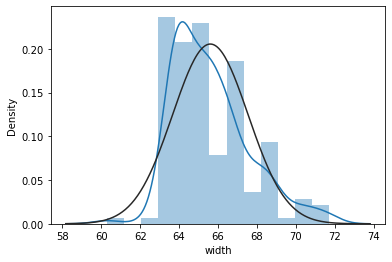

In [24]:
sb.distplot(df.width, fit=norm)

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='curb_weight', ylabel='Density'>

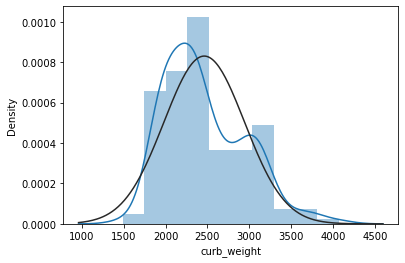

In [25]:
sb.distplot(df.curb_weight, fit=norm)

#### Multivariate Analysis

Text(0.5, 1.0, 'width vs price')

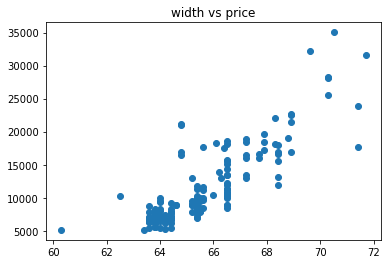

In [26]:
plt.scatter(df.width, df.price)
plt.title("width vs price")

Text(0.5, 1.0, 'weight vs price')

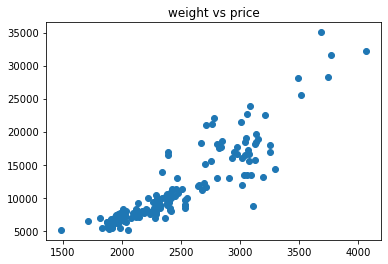

In [27]:
plt.scatter(df.curb_weight, df.price)
plt.title("weight vs price")

Some Count plots

<AxesSubplot:>

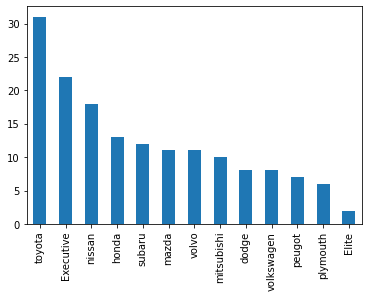

In [28]:
df['make'].value_counts().plot(kind='bar')

<AxesSubplot:>

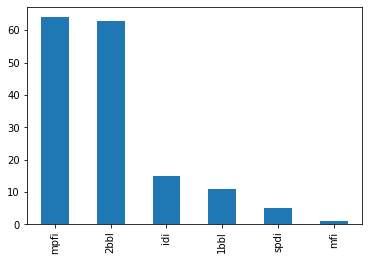

In [29]:
df['fuel_system'].value_counts().plot(kind='bar')

<AxesSubplot:>

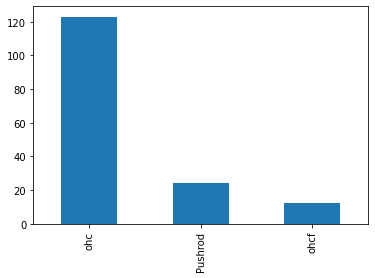

In [30]:
df['engine_type'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'price vs engine-size: Strong Positive')

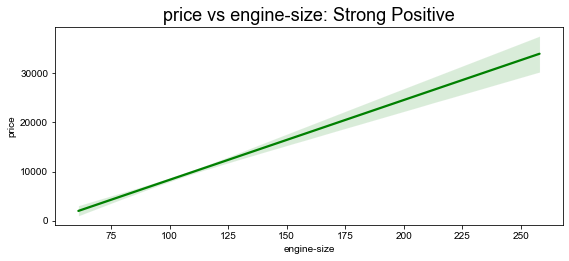

In [31]:
fig = plt.figure(figsize=(20,8)) #create figure
ax0 = fig.add_subplot(2, 2, 1)

seab.set(font_scale=1.5)
seab.regplot(x='engine-size', y='price', data=df, color='green', marker=' ', scatter_kws={'s': 50},ax=ax0)
ax0.set_title('price vs engine-size: Strong Positive')

Text(0.5, 1.0, 'price vs curb_weight : Positive')

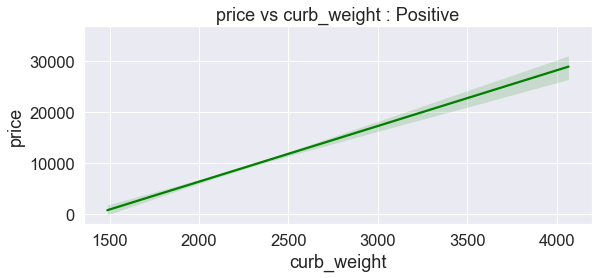

In [32]:
fig = plt.figure(figsize=(20,8)) #create figure
ax0 = fig.add_subplot(2, 2, 1)

seab.set(font_scale=1.5)
seab.regplot(x='curb_weight', y='price', data=df, color='green', marker=' ', scatter_kws={'s': 50},ax=ax0)
ax0.set_title('price vs curb_weight : Positive')

## Feature Engineering

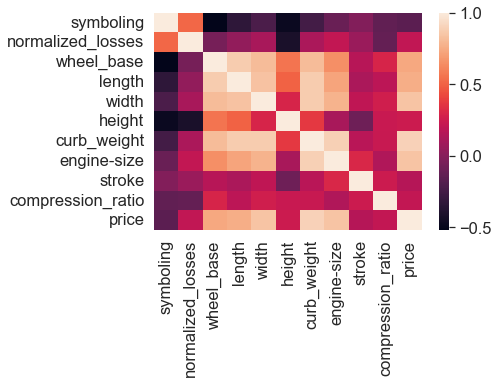

In [33]:
corr = df.corr()
ax = sb.heatmap(corr) #heatmap of correlation


### Creating Dummy values for categorical columns

In [34]:
make = pd.get_dummies(df.make, drop_first=True, prefix='make') # creates dummy columns
df = df.join(make)
df.drop(['make'], axis=1, inplace=True)

In [35]:
fuel_type = pd.get_dummies(df.fuel_type, drop_first=True, prefix='') # creates dummy columns
df = df.join(fuel_type)
df.drop(['fuel_type'], axis=1, inplace=True)

In [36]:
num_doors = pd.get_dummies(df.num_doors, drop_first=True, prefix='door') # creates dummy columns
df = df.join(num_doors)
df.drop(['num_doors'], axis=1, inplace=True)

In [37]:
body_style = pd.get_dummies(df.body_style, drop_first=True, prefix='body') 
df = df.join(body_style)
df.drop(['body_style'], axis=1, inplace=True)

In [38]:
wheel_drive = pd.get_dummies(df.wheel_drive, drop_first=True, prefix='wd') # creates dummy columns
df = df.join(wheel_drive)
df.drop(['wheel_drive'], axis=1, inplace=True)

In [39]:
Engine_location = pd.get_dummies(df.Engine_location, drop_first=True, prefix='eng_loc') # creates dummy columns
df = df.join(Engine_location)
df.drop(['Engine_location'], axis=1, inplace=True)

In [40]:
engine_type = pd.get_dummies(df.engine_type, drop_first=True, prefix='eng_type') # creates dummy columns
df = df.join(engine_type)
df.drop(['engine_type'], axis=1, inplace=True)

In [41]:
fuel_system = pd.get_dummies(df.fuel_system, drop_first=True, prefix='fuel_sys') # creates dummy columns
df = df.join(fuel_system)
df.drop(['fuel_system'], axis=1, inplace=True)

In [42]:
target = df.price
features = df.drop("price" ,axis=1)

### Selecting features on various Methods

1. Correlation Based

In [43]:
df_corr = df[["curb_weight","engine-size","width","length"]]

2. Variance Threshold Selection

In [44]:
vt = VarianceThreshold(threshold=0.2)
vt.fit(features)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=features.columns)
df_vt = features.iloc[:,vt.get_support()]

3. Kbest selection

In [45]:
kbest = SelectKBest(score_func=f_regression, k=6)
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.3, random_state=42)
kbest.fit_transform(X_train, y_train)
df_selKBest = features.iloc[:,kbest.get_support()]

C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Initiating some lists

In [46]:
fsel_list = []
ftrans_list = []
fscal_list = []
r2_scores = []
rmse_scores = []

Creating Functions

In [47]:
def Lin_Reg(features, response):
    X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.25, 
                                                    random_state=42)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    return X_train, X_test, Y_train, Y_test, model

In [48]:
def Scalefunc(scale,dataFrame):   #for scaling the features
    scaled_features = scale.fit_transform(dataFrame)
    scaled_df = pd.DataFrame(scaled_features, columns = dataFrame.columns)
    return scaled_df

In [49]:
def polynom(dataFrame): #for polynomial feature transformation
    pf = PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
    fit_pf = pf.fit(dataFrame)
    poly = pd.DataFrame(pf.transform(dataFrame), columns = fit_pf.get_feature_names(dataFrame.columns))
    return poly

In [50]:
def Logfunction(dataFrame):
    df_log = pd.DataFrame()
    for (columnName) in dataFrame.columns:
        colName = columnName + '_log1p'
        df_log[colName] = features[columnName].apply(lambda x: np.log1p(x))
    return df_log

i. Linear regression with correlation based selected features

In [51]:
X_train, X_test, Y_train, Y_test, model = Lin_Reg(df_corr, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("Correlation Based")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

ii. Linear Regression model with Correlation based selected features and Polynomial Features transformation

In [52]:
Poly_features = polynom(df_corr)
X_train, X_test, Y_train, Y_test, model = Lin_Reg(Poly_features, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("Correlation Based")
ftrans_list.append("Poly 2")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


iii. Linear Regression model with Correlation based selected features and a feature scaling method

In [53]:
scaler = MinMaxScaler() #using minmax scaling method
df_minmax = Scalefunc(scaler,df_corr)
X_train, X_test, Y_train, Y_test, model = Lin_Reg(df_minmax, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("Correlation Based")
ftrans_list.append("None")
fscal_list.append("MinMax")
r2_scores.append(r2)
rmse_scores.append(rmse)

iv. Linear Regression model with All features, Polynomial Features and MinMax Scaling

In [54]:
Poly_feat = polynom(features)
Poly_scaled_df = Scalefunc(scaler,Poly_features)
X_train, X_test, Y_train, Y_test, model = Lin_Reg(Poly_scaled_df, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("Correlation Based")
ftrans_list.append("Poly 2")
fscal_list.append("MinMax")
r2_scores.append(r2)
rmse_scores.append(rmse)

C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


v. Linear Regression model with Variance Threshold Selection

In [55]:
X_train, X_test, Y_train, Y_test, model = Lin_Reg(df_vt, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("VT")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

vi. Linear Regression model with Variance Threshold Selection and Polynomial feature Transformation

In [56]:
X_train, X_test, Y_train, Y_test, model = Lin_Reg(df_vt, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("VT")
ftrans_list.append("Poly 2")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

vii. Linear Regression model with Variance Threshold Selection and Feature scaling method

In [57]:
scaler = MinMaxScaler() #using minmax scaling method
df_minmax = Scalefunc(scaler,df_vt)
X_train, X_test, Y_train, Y_test, model = Lin_Reg(df_minmax, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("VT")
ftrans_list.append("None")
fscal_list.append("MinMax")
r2_scores.append(r2)
rmse_scores.append(rmse)

viii. Linear Regression model with VAriance Threshold , Polynomial Features and MinMax Scaling

In [58]:
Poly_feat = polynom(df_vt)
Poly_scaled_df = Scalefunc(scaler,Poly_features)
X_train, X_test, Y_train, Y_test, model = Lin_Reg(Poly_scaled_df, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("VT")
ftrans_list.append("Poly 2")
fscal_list.append("MinMax")
r2_scores.append(r2)
rmse_scores.append(rmse)

C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ix. Linear Regression model with SelectKBest Selection

In [59]:
X_train, X_test, Y_train, Y_test, model = Lin_Reg(df_selKBest, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("SelectKBest")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

x. Linear Regression model with SelectKBest Selection polynomial transformation

In [60]:
X_train, X_test, Y_train, Y_test, model = Lin_Reg(df_selKBest, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("SelectKBest")
ftrans_list.append("Poly 2")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

xi. Linear Regression model with SelectKBest Selection and scaled features

In [61]:
scaler = MinMaxScaler() #using minmax scaling method
df_minmax = Scalefunc(scaler,df_selKBest)
X_train, X_test, Y_train, Y_test, model = Lin_Reg(df_minmax, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("SelectKBest")
ftrans_list.append("None")
fscal_list.append("MinMax")
r2_scores.append(r2)
rmse_scores.append(rmse)

xii. Linear Regression model with SelectKBest , Polynomial Features and MinMax Scaling

In [62]:
Poly_feat = polynom(df_selKBest)
Poly_scaled_df = Scalefunc(scaler,Poly_features)
X_train, X_test, Y_train, Y_test, model = Lin_Reg(Poly_scaled_df, target)
Y_pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
rmse = (mean_squared_error(Y_test, Y_pred))**0.5

fsel_list.append("SelectKBest")
ftrans_list.append("Poly 2")
fscal_list.append("MinMax")
r2_scores.append(r2)
rmse_scores.append(rmse)

C:\Users\Abhinav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
df_result = pd.DataFrame(list(zip(fsel_list, ftrans_list,fscal_list,r2_scores,rmse_scores)),   #making summary table
               columns =['Feature Selection', 'Feature Transformation', 'Feature Scaling', 'R2', 'RMSE'])
df_result

,Feature Selection,Feature Transformation,Feature Scaling,R2,RMSE
0,Correlation Based,None,None,0.765479,2478.222642
1,Correlation Based,Poly 2,None,0.793183,2327.243576
2,Correlation Based,None,MinMax,0.765479,2478.222642
3,Correlation Based,Poly 2,MinMax,0.793183,2327.243576
4,VT,None,None,0.679558,2896.838005
5,VT,Poly 2,None,0.679558,2896.838005
6,VT,None,MinMax,0.679558,2896.838005
7,VT,Poly 2,MinMax,0.793183,2327.243576
8,SelectKBest,None,None,0.773519,2435.369177
9,SelectKBest,Poly 2,None,0.773519,2435.369177


In [64]:
df_result.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)

,Feature Selection,Feature Transformation,Feature Scaling,R2,RMSE
1,Correlation Based,Poly 2,None,0.793183,2327.243576


As we can see here the best model that fits here is the one with correlation based features with polynomial transformation

SCatter plot of predicted vs actual values

Text(0.5, 1.0, 'Linear Regression Model to Predict Car price')

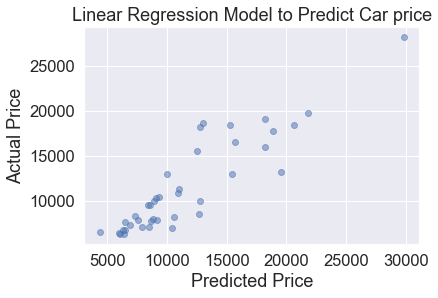

In [65]:
plt.scatter(Y_pred, Y_test, alpha=0.5)
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.title('Linear Regression Model to Predict Car price')

In [66]:
# Displaying coefficient list
feature_list = list(X_train.columns)
coeff = model.coef_.transpose()
coeff_table = np.vstack((feature_list, coeff)).T

coeff_df = pd.DataFrame(coeff_table, columns=['Feature', 'Coefficients'])
coeff_df

,Feature,Coefficients
0,curb_weight,-246274.4225822274
1,engine-size,59650.753309474174
2,width,-56651.70967024051
3,length,3243.801912151781
4,curb_weight engine-size,-5696.741213853737
5,curb_weight width,359685.71766389965
6,curb_weight length,-72122.8436186319
7,engine-size width,-14768.76265773579
8,engine-size length,-39019.916007072694
9,width length,30423.790464615624


Prediction with sample and evaluating the model

In [67]:
featSel_list = [Poly_scaled_df, df_selKBest,df_corr]
featSel_method = ['Manual', 'Variance Threshhold', 'SelectKBest']